In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pretty_graph(arr, ylabel='L2 hit-rate'):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    plt.tight_layout()
    plt.xlabel('backprop kernels (in-order)')
    plt.ylabel(ylabel)
    ax.bar(list(range(len(arr))), height=arr, width=1)

In [3]:
#model = 'resnet50'
#model = 'resnet152'
model = 'vgg16'

In [4]:
onegpu = pd.read_csv('./src/'+model+'/onegpu.csv')
onegpu = onegpu.drop(0)
cols = onegpu.columns[4:]
onegpu[cols] = onegpu[cols].apply(pd.to_numeric, errors='coerce')

In [5]:
multigpu = pd.read_csv('./src/'+model+'/multigpu.csv')
multigpu = multigpu.drop(0)
cols = multigpu.columns[4:]
multigpu[cols] = multigpu[cols].apply(pd.to_numeric, errors='coerce')

In [6]:
trans1 = onegpu['l2_tex_read_transactions'].to_numpy()
hitrate1 = onegpu['l2_tex_read_hit_rate'].to_numpy()
bytes1 = onegpu['l2_global_load_bytes'].to_numpy()

trans4 = multigpu['l2_tex_read_transactions'].to_numpy()
hitrate4 = multigpu['l2_tex_read_hit_rate'].to_numpy()
bytes4 = multigpu['l2_global_load_bytes'].to_numpy()


idx1 = trans1!=0
idx4 = trans4!=0

hitrate1 = hitrate1[idx1]
hitrate4 = hitrate4[idx4]

bytes1 = bytes1[idx1]
bytes4 = bytes4[idx4]

trans1 = trans1[idx1]
trans4 = trans4[idx4]


## Printing L2 hit-rates

#### SingleGPU system, L2 hit-rate for GPU0

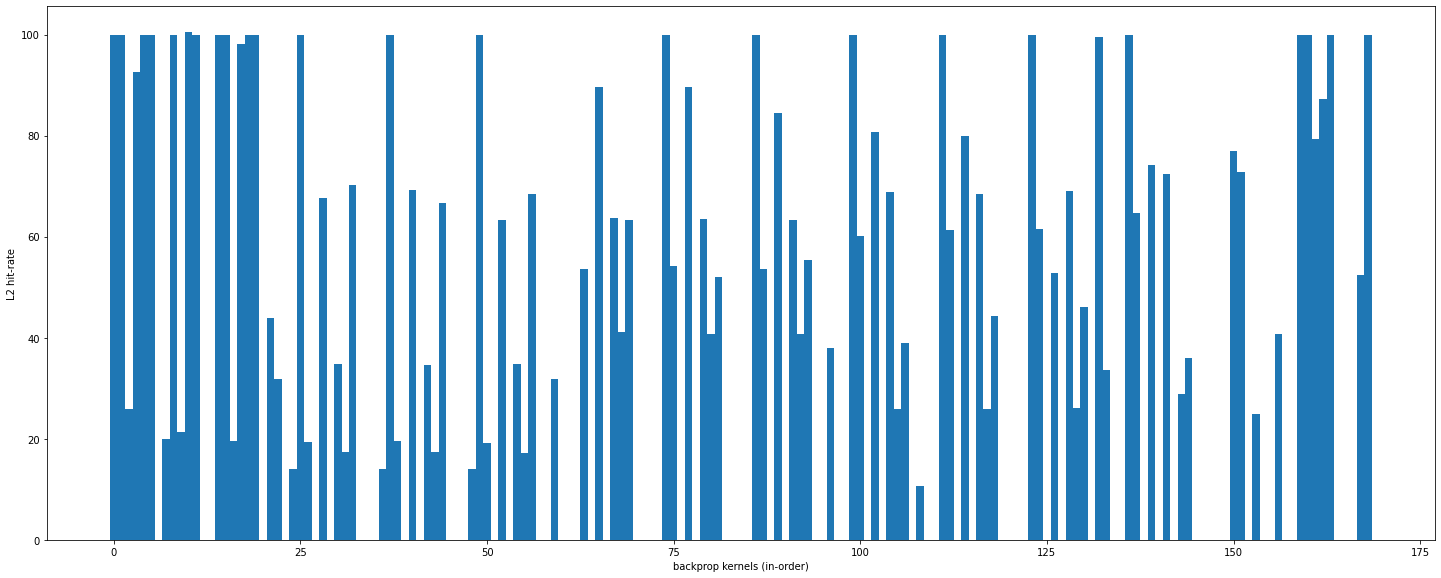

In [7]:
pretty_graph(hitrate1)

In [8]:
print("Single GPU system, GPU0 average L2 hit-rate is {:2f}%".format(hitrate1.mean()))

Single GPU system, GPU0 average L2 hit-rate is 35.852625%


#### Overlapped MultiGPU system, L2 hit-rate for GPU0

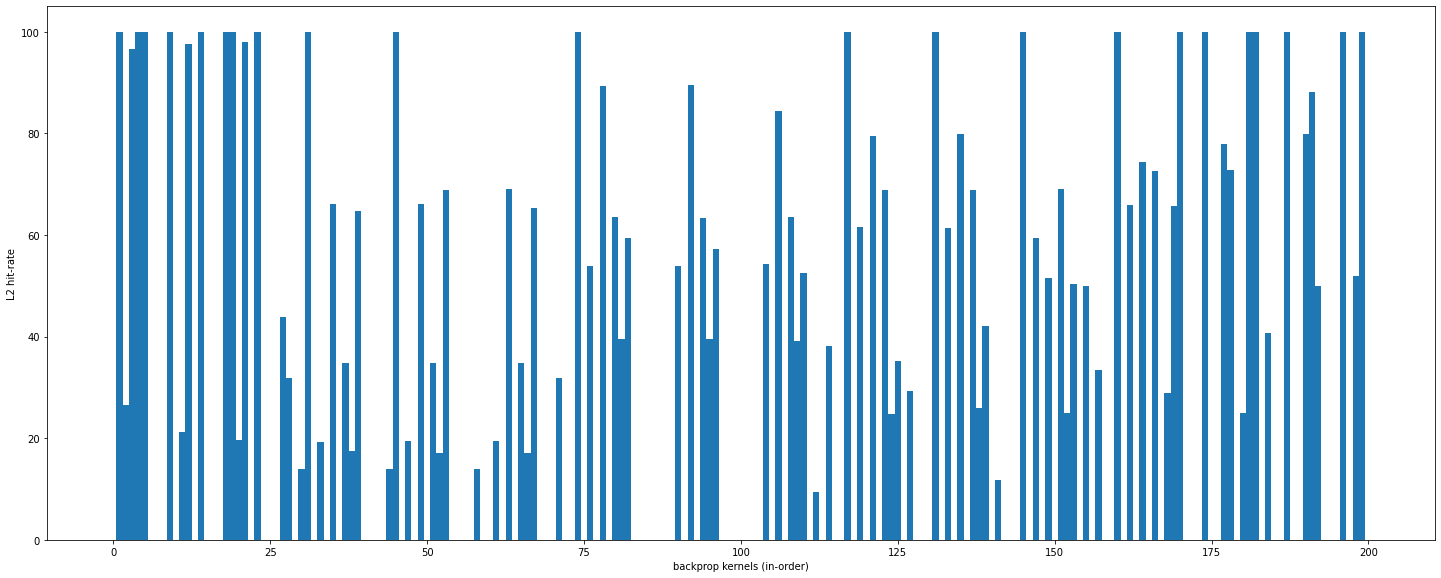

In [9]:
pretty_graph(hitrate4)

In [10]:
print("4 GPU system, GPU0 average L2 hitrate is {:2f}%".format(hitrate4.mean()))

4 GPU system, GPU0 average L2 hitrate is 29.828262%


## Printing (L2 hit-rate)*(bytes requested)

In [ ]:
def abc(hitrate, b):
    arr = hitrate*b/100
    return arr

In [ ]:
d1 = abc(hitrate1, trans1)
pretty_graph(d1, 'hitrate*bytes')

In [ ]:
d2 = abc(hitrate4, trans4)
pretty_graph(d2, 'hitrate*bytes')

In [ ]:
d1.mean()

In [ ]:
d2.mean()